<a target="_blank" href="https://colab.research.google.com/github/paulotguerra/QXD0178/blob/main/02.01-Mineracao-de-Dados-Classificacao.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## QXD0178 - Mineração de Dados
# Tarefas de Mineração de Dados: Classificação

**Professor:** Paulo de Tarso Guerra Oliveira ([paulodetarso@ufc.br](mailto:paulodetarso@ufc.br))

Adaptado de: [*Python Data Science Handbook*](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html) 


# O problema da classificação de dados

O aprendizado de máquina é frequentemente categorizado como um subcampo da inteligência artificial, contudo na aplicação de métodos de aprendizado de máquina pela ciência de dados, é mais útil pensar no aprendizado de máquina como um meio de *construir modelos de dados*.

A "aprendizagem" entra em cena quando damos a esses modelos *parâmetros ajustáveis* ​​que podem ser adaptados aos dados observados; desta forma, pode-se considerar que o programa está "aprendendo" com os dados. 

Uma vez que esses modelos tenham sido ajustados aos dados vistos anteriormente, eles podem ser usados ​​para prever e compreender aspectos de novos dados observados. 

Compreender a definição de problemas no aprendizado de máquina é essencial para usar essas ferramentas de maneira eficaz.

### Categorias de aprendizado de máquina

O aprendizado de máquina pode ser categorizado em dois tipos principais: aprendizado supervisionado e aprendizado não supervisionado.


A **aprendizagem supervisionada** envolve de alguma forma modelar a relação entre características medidas dos dados e algum rótulo associado aos dados; uma vez determinado este modelo, ele pode ser usado para aplicar rótulos a dados novos e desconhecidos. 

Isto é subdividido em tarefas de **classificação** e tarefas de **regressão**: na classificação, os rótulos são categorias discretas, enquanto na regressão, os rótulos são quantidades contínuas.





A **aprendizagem não supervisionada** envolve modelar as características de um conjunto de dados sem referência a qualquer rótulo e é frequentemente descrita como "deixar o conjunto de dados falar por si".  Esses modelos incluem tarefas de **agrupamento** e de **redução de dimensionalidade**. 

Os algoritmos de agrupamento identificam grupos distintos de dados, enquanto os algoritmos de redução de dimensionalidade procuram representações mais sucintas dos dados. 



Além disso, existem os chamados métodos de **aprendizado semi-supervisionado**, que ficam em entre o aprendizado supervisionado e o não supervisionada. Os métodos de aprendizagem semissupervisionados costumam ser úteis quando apenas rótulos incompletos estão disponíveis.

## Classificação: predição de rótulos discretos

Primeiro daremos uma olhada em uma tarefa de classificação simples, na qual você recebe um conjunto de pontos rotulados e deseja usá-los para classificar alguns pontos não rotulados.

Imagine que temos os dados mostrados nesta figura:

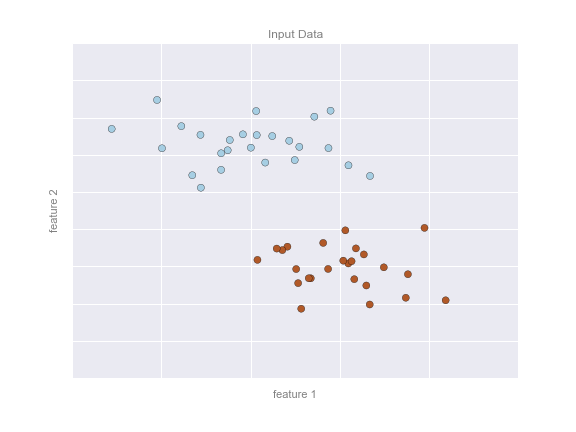

No exemplo temos dados bidimensionais: ou seja, duas *características* para cada ponto, representadas pelas posições $(x,y)$ dos pontos no plano. 
Além disso, temos um dos dois *rótulos de classe* para cada ponto, aqui representados pelas cores dos pontos. 
A partir dessas características e rótulos, gostaríamos de criar um modelo que nos permitirá decidir se um novo ponto deve ser rotulado como "azul" ou "vermelho".




Existem vários modelos possíveis para tal tarefa de classificação, mas aqui usaremos um modelo extremamente simples. Faremos a suposição de que os dois grupos podem ser separados traçando uma linha reta através do plano entre eles, de modo que os pontos de cada lado da linha caiam no mesmo grupo. 



Aqui o *modelo* é uma versão quantitativa da afirmação "uma linha reta separa as classes", enquanto os *parâmetros do modelo *são os números específicos que descrevem a localização e orientação dessa linha para os nossos dados. 
Os valores ótimo para esses parâmetros do modelo são aprendidos a partir dos dados (este é o "aprendizado" no aprendizado de máquina), o que geralmente é chamado de *treinamento do modelo*.

A figura a seguir mostra uma representação visual de um modelo treinado com esses dados.

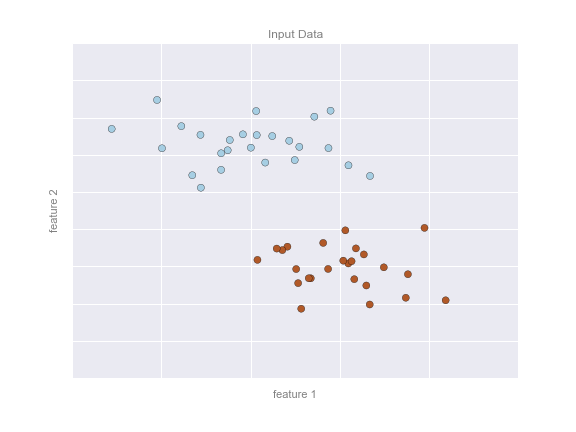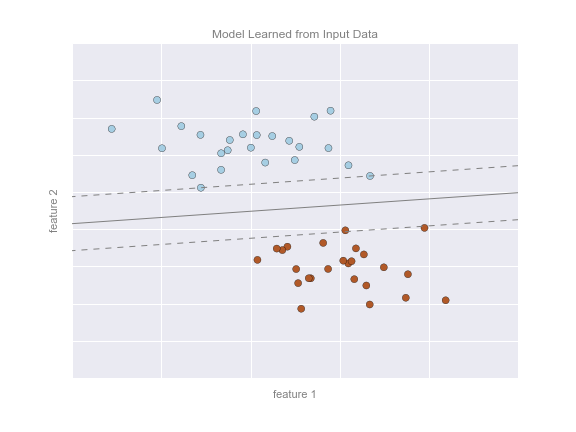

Agora que este modelo foi treinado, ele pode ser generalizado para dados novos e não rotulados. 
Podemos pegar num novo conjunto de dados, desenhar esta linha de modelo através dele e atribuir rótulos aos novos pontos com base neste modelo. 
Esta fase é geralmente chamada de *previsão*.

Esta é a ideia básica de uma tarefa de classificação em aprendizado de máquina, onde "classificação" indica que os dados possuem rótulos de classe discretos. 

À primeira vista isto pode parecer bastante trivial: seria relativamente fácil simplesmente olhar para estes dados e traçar uma linha discriminatória para realizar esta classificação. 



Um benefício da abordagem de aprendizado de máquina, entretanto, é que ela pode generalizar para conjuntos de dados muito maiores em muito mais dimensões.

Por exemplo, isso é semelhante à tarefa de detecção automatizada de spam para e-mail; neste caso, podemos usar as seguintes características e rótulos:

- *feature 1*, *feature 2*, etc. $\to$ contagens normalizadas de palavras ou frases importantes ("dinheiro", "príncipe nigeriano", etc.)
- *rótulo* $\to$ "spam" ou "not spam"



Para o conjunto de treinamento, esses rótulos podem ser determinados pela inspeção individual de uma pequena amostra representativa de e-mails; para os emails restantes, o rótulo seria determinado usando o modelo. 
Para um algoritmo de classificação adequadamente treinado com recursos bem construídos (normalmente milhares ou milhões de palavras ou frases), esse tipo de abordagem pode ser muito eficaz.

Alguns dos algoritmos de classificação mais importantes são Gaussian Naive Bayes (GNB), Support Vector Machines (SVM), e Random Forest (RF).

## Naive Bayes (NB)


Os modelos Naive Bayes são um grupo de algoritmos de classificação extremamente rápidos e simples que geralmente são adequados para conjuntos de dados de dimensões muito altas. Por serem tão rápidos e terem poucos parâmetros ajustáveis, eles acabam sendo muito úteis como uma *baseline* rápido para um problema de classificação. 

Os classificadores Naive Bayes são construídos com base em métodos de classificação bayesiana. 
Estes baseiam-se no **teorema de Bayes**, que é uma equação que descreve a relação de probabilidades condicionais de quantidades estatísticas. 



Na classificação Bayesiana, estamos interessados ​​em encontrar a probabilidade de um rótulo dadas algumas características observadas, que podemos escrever como $P(L~|~{\rm features})$. 
O teorema de Bayes nos diz como expressar isso em termos de quantidades que podemos calcular mais diretamente:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

Se estamos tentando decidir entre dois rótulos, $L_1$ e $L_2$, então uma maneira de tomar essa decisão é calcular a razão das probabilidades posteriores para cada rótulo:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$



In [1]:
import pandas as pd

data = {'condicoes':['chuva','noite','dia','dia','noite','chuva','chuva','noite','dia','dia'],
        'estrada':['ruim','boa','ruim','otima','otima','boa','otima','ruim','otima','ruim'],
        'transito':['pesado','normal','leve','leve','normal','leve','normal','pesado','pesado','pesado'],
        'defeito':['não','sim','não','sim','não','não','não','não','sim','sim'],
        'acidente':['sim','sim','não','sim','não','não','não','sim','não','sim']}

dfX = pd.DataFrame(data)[:8]
dfX

,condicoes,estrada,transito,defeito,acidente
0,chuva,ruim,pesado,não,sim
1,noite,boa,normal,sim,sim
2,dia,ruim,leve,não,não
3,dia,otima,leve,sim,sim
4,noite,otima,normal,não,não
5,chuva,boa,leve,não,não
6,chuva,otima,normal,não,não
7,noite,ruim,pesado,não,sim


Tudo o que precisamos agora é de algum modelo pelo qual possamos calcular $P({\rm features}~|~L_i)$ para cada rótulo. 
Tal modelo é chamado de *modelo generativo* porque especifica o processo aleatório hipotético que gera os dados. 

Especificar este modelo generativo para cada rótulo é a parte principal do treinamento de tal classificador Bayesiano. 



A versão geral de tal etapa de treinamento é uma tarefa muito difícil, mas podemos simplificá-la através do uso de algumas suposições simplificadoras sobre a forma deste modelo.


É aqui que entra o termo "naive" (ingênuo) em "Naive Bayes": se fizermos suposições sobre o modelo generativo para cada rótulo, poderemos encontrar uma aproximação para cada classe e então prosseguir com a classificação Bayesiana. 

Diferentes tipos de classificadores Bayes ingênuos baseiam-se em diferentes suposições ingênuas sobre os dados.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Talvez o classificador mais fácil de entender seja o Gaussian Naive Bayes. Neste classificador, a suposição é que os dados de cada rótulo são extraídos de uma distribuição gaussiana simples. 
$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x - \mu}{\sigma})}$$
onde $\mu$ é a média e $\sigma$ o desvio padrão.

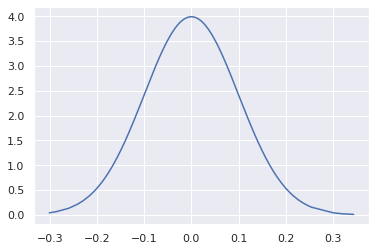

In [3]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 0, 0.1 # média e desvio padrão

x = np.sort(np.random.normal(mu, sigma, 1000))
y = 1/(sigma * np.sqrt(2 * np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))

plt.plot(x, y)
plt.show()


Imagine que temos os seguintes dados:

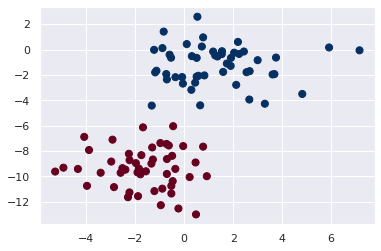

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');


Uma maneira extremamente rápida de criar um modelo simples é assumir que os dados são descritos por uma distribuição gaussiana sem covariância entre dimensões. Este modelo pode ser ajustado simplesmente encontrando a média e o desvio padrão dos pontos dentro de cada rótulo, que é tudo o que você precisa para definir tal distribuição. 

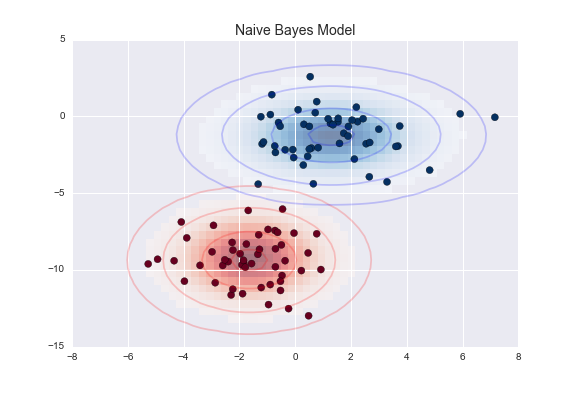

As elipses aqui representam o modelo generativo gaussiano para cada rótulo, com maior probabilidade em direção ao centro das elipses. 

Com este modelo generativo implementado para cada classe, temos uma receita simples para calcular a probabilidade $P({\rm features}~|~L_1)$ para qualquer ponto de dados e, assim, podemos calcular rapidamente a razão posterior e determinar qual rótulo é o mais provável para um determinado ponto.

Este procedimento é implementado em ``sklearn.naive_bayes.GaussianNB``:

In [5]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

Agora vamos gerar alguns novos dados e prever o rótulo:

In [6]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Agora podemos representar graficamente esses novos dados para ter uma ideia de ocorre o processo de decisão:

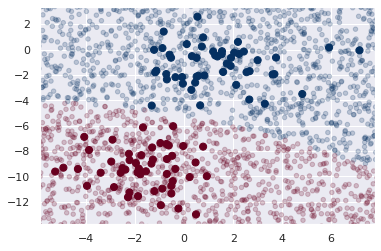

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.21)
plt.axis(lim);

Uma boa coisa desse formalismo bayesiano é que ele permite extrair naturalmente uma classificação probabilística, que podemos calcular usando o método ``predict_proba``:

In [8]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)
Xnew[-1], ynew[-1], yprob[-1]

(array([ 7.05928655, -8.44990818]), 1, array([0.15308349, 0.84691651]))

As colunas fornecem as probabilidades posteriores do primeiro e do segundo rótulos, respectivamente. 

A classificação final é tão boa quanto as suposições do modelo que levam a ela, e é por isso que o Gaussian Naive Bayes muitas vezes não produz resultados muito bons.  Ainda assim, em muitos casos - especialmente à medida que o número de características se torna grande - esta suposição não é prejudicial o suficiente para impedir que ele seja um método útil.

### Quando usar Naive Bayes 
Como os classificadores Bayesianos ingênuos fazem suposições tão rigorosas sobre os dados, eles geralmente não terão um desempenho tão bom quanto um modelo mais complicado. 




Dito isto, eles têm várias vantagens:

- Eles são extremamente rápidos tanto para treinamento quanto para previsão
- Eles fornecem previsão probabilística direta
- Muitas vezes são facilmente interpretáveis
- Eles têm muito poucos (se houver) parâmetros ajustáveis
- Essas vantagens significam que um classificador Bayesiano ingênuo costuma ser uma boa escolha como classificação de linha de base inicial. Se funcionar adequadamente, você tem um classificador muito rápido e interpretável para o seu problema. Se não funcionar bem, você poderá começar a explorar modelos mais sofisticados, com algum conhecimento básico de quão bem eles devem funcionar.


Os classificadores Bayesianos ingênuos tendem a ter um desempenho especialmente bom em uma das seguintes situações:

- Quando as suposições ingênuas realmente correspondem aos dados (muito raro na prática)
- Para categorias muito bem separadas, quando a complexidade do modelo é menos importante
- Para dados de dimensões muito altas, quando a complexidade do modelo é menos importante

Os dois últimos pontos parecem distintos, mas na verdade estão relacionados: à medida que a dimensão de um conjunto de dados cresce, é muito menos provável que quaisquer dois pontos sejam encontrados próximos (afinal, eles devem estar próximos em todas as dimensões para serem próximos no geral). Isto significa que os clusters em dimensões altas tendem a ser mais separados, em média, do que os clusters em dimensões baixas, assumindo que as novas dimensões realmente acrescentam informação. 

Classificadores simplistas como o Naive Bayes tendem a funcionar tão bem ou melhor que classificadores mais complicados à medida que a dimensionalidade aumenta: uma vez que você tenha dados suficientes, até mesmo um modelo simples pode ser muito poderoso.

## K-Nearest Neighbor (kNN)

Nesta abordagem, o rótulo de uma instância é previsto com base na classe majoritária das *k* instâncias de treinamento mais próximas. O número de vizinhos mais próximos, *k*, é um hiperparâmetro que deve ser fornecido pelo usuário, juntamente com a métrica de distância. 

Por padrão, podemos usar a distância euclidiana (distância de Minkowski com expoente p=2):

\begin{equation*}
\textrm{Distância}(x,y) = \bigg[\sum_{i=1}^N |x_i-y_i|^p \bigg]^{\frac{1}{p}}
\end{equation*}

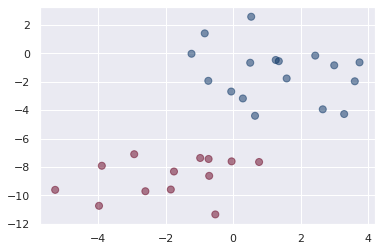

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='RdBu', alpha=0.5);
# plt.scatter(X_test[10, 0], X_test[10, 1], c='orange', s=50, cmap='RdBu');
# plt.scatter(X_test[30, 0], X_test[30, 1], c='orange', s=50, cmap='RdBu');


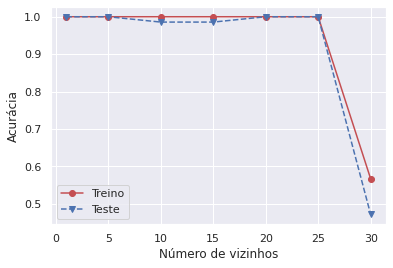

In [10]:
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)

    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Treino','Teste'])
plt.xlabel('Número de vizinhos')
plt.ylabel('Acurácia');

## Support Vector Machines (SVM) 


Máquinas de vetores de suporte (SVMs) são uma classe particularmente poderosa e flexível de algoritmos supervisionados para classificação e regressão.

Vimos que classificação bayesiana é um modelo simples que descreve a distribuição de cada classe subjacente. Usamos esses modelos para determinar probabilisticamente rótulos para novos pontos. Esse foi um exemplo de *classificação generativa*. SMV, em vez disso, é uma técnica de *classificação discriminativa*: em vez de modelar cada classe, simplesmente encontraremos uma linha ou curva (em duas dimensões) ou hiperplano (em múltiplas dimensões) que divide as classes umas das outras.

Novamente, considere o caso simples de uma tarefa de classificação, em que as duas classes de pontos estão bem separadas:

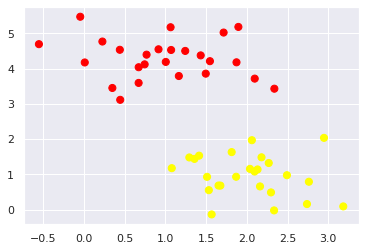

In [11]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Um classificador discriminativo linear tentaria traçar uma linha reta separando os dois conjuntos de dados e, assim, criar um modelo para classificação. 

Para dados bidimensionais, esta é uma tarefa que poderíamos realizar manualmente, porém imediatamente vemos um problema: há mais de uma linha divisória possível que pode discriminar as duas classes.

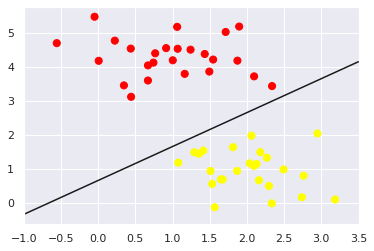

In [12]:
xfit = np.linspace(-1, 3.5)
plt.xlim(-1, 3.5);
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

plt.plot(xfit, 1.0 * xfit + 0.65, '-k');
# plt.plot(xfit, 0.5 * xfit + 1.60, '-k');
# plt.plot(xfit,-0.2 * xfit + 2.90, '-k');

# plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10);

São três separadores muito diferentes que, no entanto, discriminam perfeitamente as amostras. Dependendo de qual você escolher, um novo ponto de dados (por exemplo, aquele marcado pelo "X" neste gráfico) receberá um rótulo diferente. 

### Máquinas de Vetores de Suporte: Maximizando a *Margem* 


As máquinas de vetores de suporte oferecem uma maneira de melhorar a escolha do separador. A intuição é, em vez de simplesmente traçar uma linha de largura zero entre as classes, traçar em torno de cada linha uma margem de alguma largura, até o ponto mais próximo.

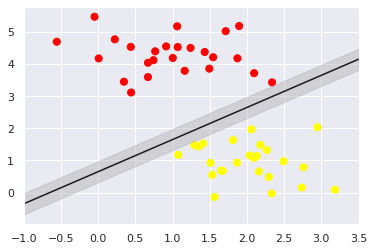

In [13]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.xlim(-1, 3.5);

def plot_with_margins(m, b, d):
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plot_with_margins(1, 0.65, 0.33)
# plot_with_margins(0.5, 1.6, 0.55)
# plot_with_margins(-0.2, 2.9, 0.2)

Nas máquinas de vetores de suporte, a linha que maximiza esta margem é aquela que escolheremos como modelo ótimo. As máquinas de vetores de suporte são um exemplo desse estimador de *margem máxima*.

### Ajustando uma máquina de vetores de suporte

Veremos o resultado de um ajuste real a esses dados. Usaremos o classificador de vetor de suporte do Scikit-Learn para treinar um modelo SVM nesses dados. Por enquanto, usaremos um kernel linear e definiremos o parâmetro `C` para um número muito grande (discutiremos o significado deles em breve)

In [14]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Para visualizar melhor o que está acontecendo, vamos criar uma função que traçará os limites de decisão do SVM:

In [15]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Exibe a função de decisão de um SVC 2D"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Cria um grid para avaliação do modelo
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Exibe a linha de decisão e as margens
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # Exibe os vetores de suporte
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, facecolors='none', edgecolors='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

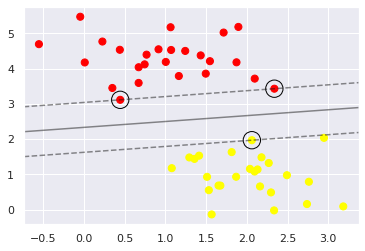

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Esta é a linha divisória que maximiza a margem entre os dois conjuntos de pontos. Observe que apenas alguns pontos de treinamento tocam a margem. 
Esses pontos são os elementos centrais desse ajuste e são conhecidos como *vetores de suporte* e dão nome ao algoritmo. 
No Scikit-Learn, a identidade desses pontos é armazenada no atributo `support_vectors_` do classificador:



In [17]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

A chave para o sucesso deste classificador é que, para o ajuste, apenas a posição dos vetores de suporte importa. Quaisquer pontos mais distantes da margem que estejam do lado correto não modificam o ajuste.

Tecnicamente, isto ocorre porque estes pontos não contribuem para a *função de perda* utilizada para ajustar o modelo, pelo que as suas posições e quantidades não importam, desde que não ultrapassem a margem.

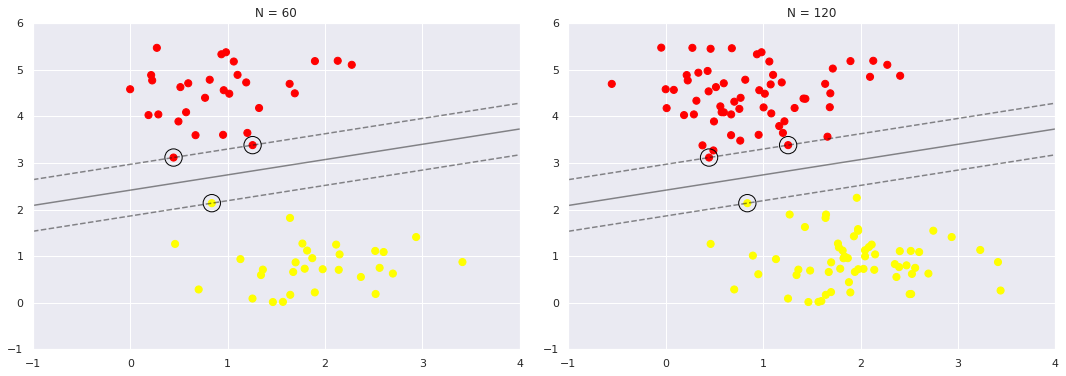

In [18]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

No lado esquerdo, vemos o modelo e os vetores de suporte para 60 pontos de treinamento. 
No lado direito, duplicamos o número de pontos de treinamento, mas o modelo não mudou: os três vetores de suporte de antes ainda são os vetores de suporte atuais. 
Esta insensibilidade ao comportamento exato de pontos distantes é um dos pontos fortes do modelo SVM.

In [19]:
from ipywidgets import interact, fixed
interact(plot_svm, N=(10,200,1), ax=fixed(None));

interactive(children=(IntSlider(value=10, description='N', max=200, min=10), Output()), _dom_classes=('widget-…

### Além dos limites lineares: Kernel SVM 


O SVM se torna extremamente poderoso é quando combinado com *kernels*. 

A ideia é projetar nossos dados em um espaço de dimensão superior definido por polinômios e funções de base gaussiana e, assim, ajustar relacionamentos não lineares com um classificador linear.

Para motivar a necessidade de kernels, vejamos alguns dados que não são linearmente separáveis:

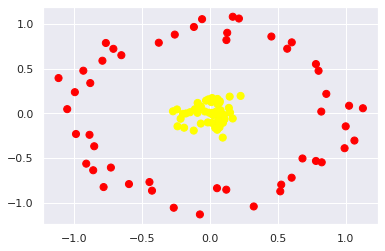

In [20]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

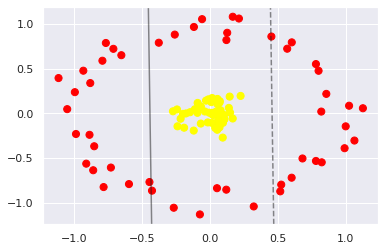

In [21]:
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plot_svc_decision_function(clf, plot_support=False);

Está claro que nenhuma discriminação linear será capaz de separar estes dados. 
Mas podemos pensar em como podemos projetar os dados em uma dimensão superior, de modo que um separador linear seja possível. 
Por exemplo, uma projeção simples que poderíamos usar seria calcular uma função de radial centrada nas instâncias centrais:

In [22]:
r = np.exp(-(X ** 2).sum(1))

Podemos visualizar essa dimensão extra de dados usando um gráfico tridimensional:

In [23]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=(-90, 90), azip=(-180, 180), X=fixed(X), y=fixed(y));

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…

Podemos ver que com esta dimensão adicional, os dados tornam-se trivialmente separáveis ​​linearmente, desenhando um plano de separação em, digamos, $r = 0,7$.

Aqui tivemos que escolher e ajustar cuidadosamente a nossa projeção: se não tivéssemos centrado a nossa função de radial no local correto, não teríamos visto resultados tão claros e linearmente separáveis. 
Em geral, a necessidade de fazer tal escolha é um problema: gostaríamos de, de alguma forma, encontrar automaticamente as melhores funções básicas para usar.

Uma estratégia para esse fim é calcular uma função básica centrada em cada ponto do conjunto de dados e deixar o algoritmo SVM analisar os resultados. 
Este tipo de transformação de função base é conhecida como *transformação de kernel*, pois é baseada em uma relação de similaridade (*kernel*) entre cada par de pontos.




Um problema potencial com esta estratégia -- projetar $N$ pontos em $N$ dimensões -- é que pode se tornar muito custoso computacionalmente à medida que $N$ cresce. 
No entanto, por causa de um pequeno procedimento conhecido como [*truque do kernel*](https://en.wikipedia.org/wiki/Kernel_trick), um ajuste nos dados transformados pelo kernel pode ser feito implicitamente, isto é, sem nunca construir a representação $N$-dimensional completa da projeção do kernel.
Esse truque do kernel está integrado ao SVM e é uma das razões pelas quais o método é tão poderoso.

No Scikit-Learn, podemos aplicar SVM kernelizado simplesmente alterando nosso kernel linear para um kernel RBF (*radial basis function*), usando o hiperparâmetro `kernel` do modelo:

In [24]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

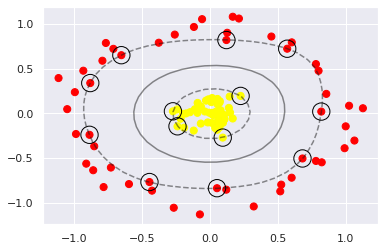

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=300, lw=1, facecolors='none');

Essa estratégia de transformação do kernel é usada frequentemente no aprendizado de máquina para transformar métodos lineares rápidos em métodos não lineares rápidos, especialmente para modelos nos quais o truque do kernel pode ser usado.

### Ajustando o SVM: suavizando margens

Nem sempre os dados possuem um limite de decisão perfeito.

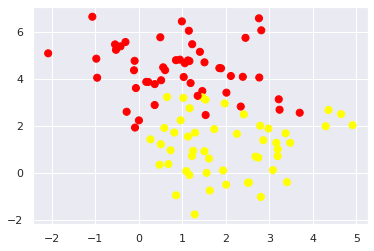

In [26]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Para lidar com esse caso, a implementação do SVM tem um fator de correção que "suaviza" a margem, ou seja, permite que alguns pontos penetrem na margem se isso permitir um melhor ajuste. 
A "dureza" da margem é controlada por um parâmetro de ajuste, mais conhecido como `C`
Para `C` muito grande, a margem é difícil e os pontos não podem estar nela. 
Para `C` menores, a margem é mais suave e pode crescer até abranger alguns pontos.

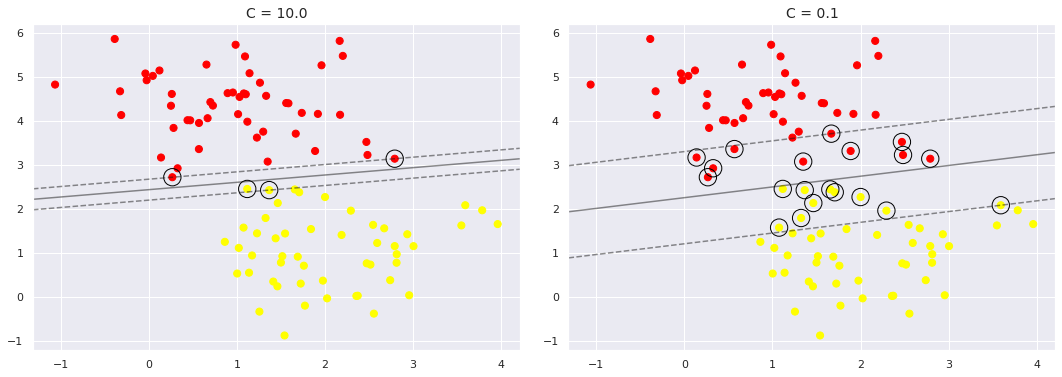

In [27]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

O valor ideal do parâmetro `C` dependerá do seu conjunto de dados e deve ser ajustado usando validação cruzada ou um procedimento semelhante.

Em resumo, Máquinas de vetores de suporte é um método de classificação poderoso por vários motivos:

- Sua dependência de relativamente poucos vetores de suporte significa que são modelos muito compactos e ocupam muito pouca memória.
- Depois que o modelo é treinado, a fase de previsão é muito rápida.
- Como são afetados apenas por pontos próximos à margem, eles funcionam bem com dados de alta dimensão – até mesmo dados com mais dimensões do que amostras, o que é desafiador para outros algoritmos.
- Sua integração com métodos de kernel os torna muito versáteis, capazes de se adaptar a diversos tipos de dados.



No entanto, os SVMs também apresentam várias desvantagens:
- A complexidade computacional é da ordem de $\mathcal{O}[N^3]$ no pior caso, ou $\mathcal{O}[N^2]$ para implementações eficientes.  Para um grande número de amostras de treinamento, esse custo computacional pode ser proibitivo.
- Os resultados dependem fortemente de uma escolha adequada para o parâmetro suavização. Isso deve ser escolhido cuidadosamente por meio de validação cruzada, que pode ser cara à medida que os conjuntos de dados aumentam de tamanho.
- Os resultados não possuem interpretação probabilística direta. Isto pode ser estimado através de uma validação cruzada interna (ver parâmtro `probability` do SVC), mas esta estimativa extra é custosa.

## Random Forest (RF)

As florestas aleatórias são um exemplo de método de *aprendizado conjunto* (*ensemble learning*), o que significa que se baseia na agregação dos resultados de um conjunto de estimadores mais simples. 
O resultado um tanto surpreendente dete tipo de método é que a soma pode ser melhor que as partes, isto é, uma votação majoritária entre vários estimadores pode acabar sendo melhor do que qualquer um dos estimadores individuais que votam.

### Árvores de Decisão

Florestas aleatórias é um método construído sobre árvores de decisão. As árvores de decisão são formas extremamente intuitivas de classificar ou rotular objetos: basta fazer uma série de perguntas destinadas a focar na classificação. 

Por exemplo, se você quiser construir uma árvore de decisão para classificar um animal que encontrar durante uma caminhada, você pode construir a seguinte árvore:

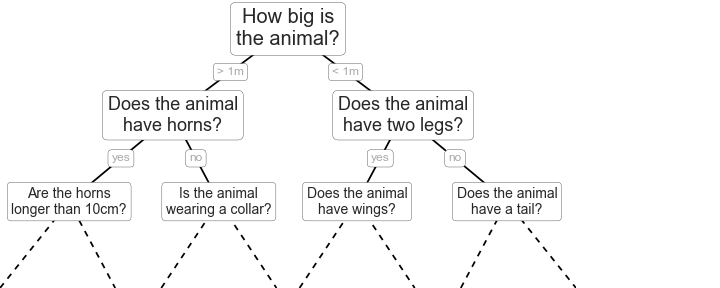

A divisão binária torna isso extremamente eficiente: em uma árvore bem construída, cada questão reduzirá o número de opções aproximadamente pela metade, estreitando rapidamente as opções mesmo entre um grande número de classes. 

O truque está em decidir quais perguntas fazer em cada etapa. 
Nas implementações de aprendizado de máquina de árvores de decisão, as perguntas geralmente assumem a forma de divisões alinhadas por características, isto é, cada nó na árvore divide os dados em dois grupos usando um valor de corte dentro do domínio de uma característica.

### Criando uma árvore de decisão

Considere os seguintes dados bidimensionais, que possuem um dos quatro rótulos de classe:

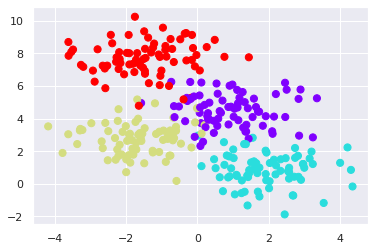

In [28]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

Uma simples árvore de decisão construída sobre estes dados irá dividir iterativamente os dados ao longo de um ou outro eixo de acordo com algum critério quantitativo, e em cada nível atribuirá o rótulo da nova região de acordo com uma votação maioritária de pontos dentro dela. 

Esta figura apresenta uma visualização dos primeiros quatro níveis de um classificador de árvore de decisão para estes dados:

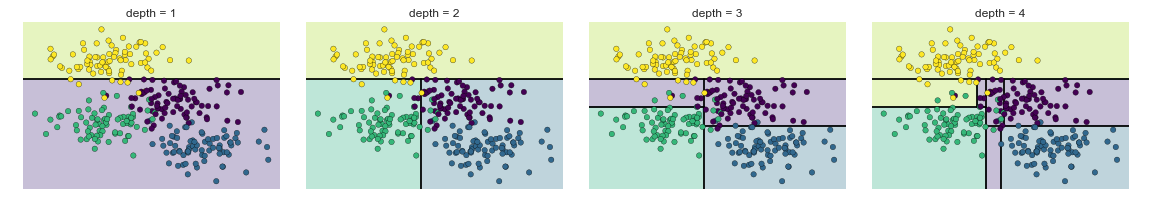

Observe que após a primeira divisão, todos os pontos do ramo superior permanecem inalterados, portanto não há necessidade de subdividir ainda mais este ramo. 
Exceto para nós que contêm todos os pontos de uma só cor, em cada nível, *toda* região é novamente dividida ao longo de uma das características.

Este processo de ajuste de uma árvore de decisão aos nossos dados pode ser feito no Scikit-Learn com o estimador `DecisionTreeClassifier`.

In [29]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)
tree

DecisionTreeClassifier()

Podemos usar a função `plot_tree` do Scikit-learn para vizualizar o resultado do aprendizado.

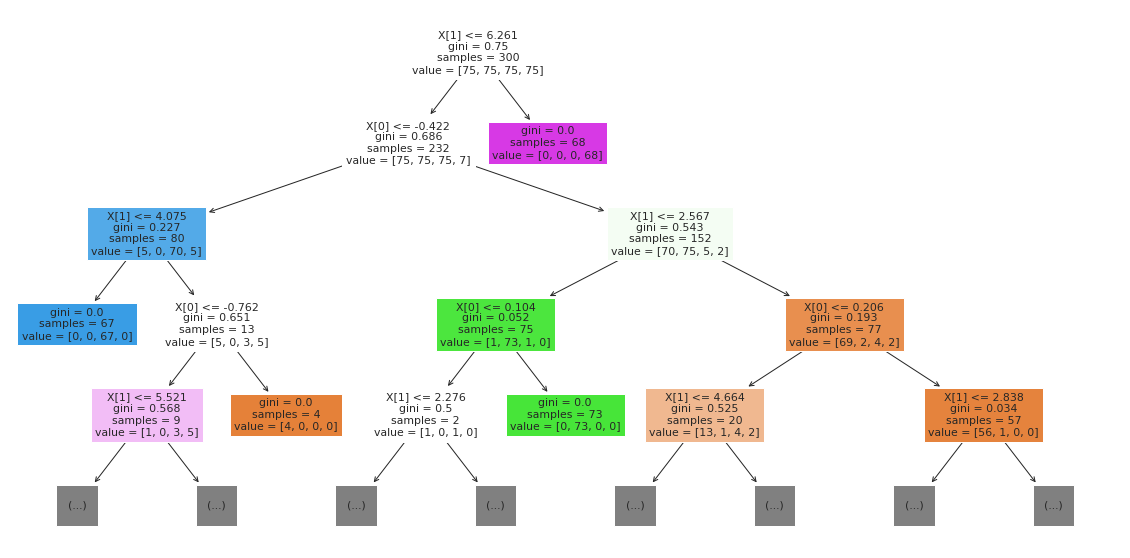

In [30]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(tree, max_depth=4, filled=True);

A seguinte função ajuda a visualizar a saída do classificador:

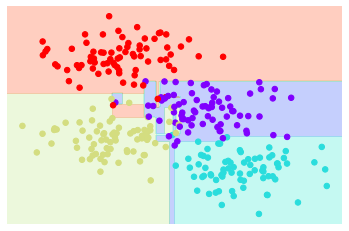

In [31]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,levels=np.arange(n_classes + 1) - 0.5,cmap=cmap,zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
visualize_classifier(DecisionTreeClassifier(), X, y);

In [32]:
def plot_tree_interactive(X, y):
    def interactive_tree(depth=1):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        visualize_classifier(clf, X, y)
    return interact(interactive_tree, depth=(1, 5))

plot_tree_interactive(X, y);    

interactive(children=(IntSlider(value=1, description='depth', max=5, min=1), Output()), _dom_classes=('widget-…

Observe que à medida que a profundidade aumenta, tendemos a obter regiões de classificação com formatos muito estranhos. Por exemplo, a uma profundidade de cinco, há uma região roxa alta e magra entre as regiões amarela e azul. 
Isso é proveniente mais da amostragem específica ou das propriedades de ruído dos dados, do que resultado da distribuição intrínseca e verdadeira dos dados. 

Esta árvore de decisão, mesmo com apenas cinco níveis de profundidade, está claramente realizando um sobreajuste (*overfitting*) dos dados.

### Árvores de decisão e *overfitting*

Este *overfitting* acaba sendo uma propriedade geral das árvores de decisão: é muito fácil criar uma árvore profunda e, assim, ajustar detalhes dos dados particulares em vez das propriedades globais das distribuições das quais são extraídos. 

Outra maneira de ver esse ajuste excessivo é observar modelos treinados em diferentes subconjuntos de dados -- por exemplo, nesta figura treinamos duas árvores diferentes, cada uma com metade dos dados originais:


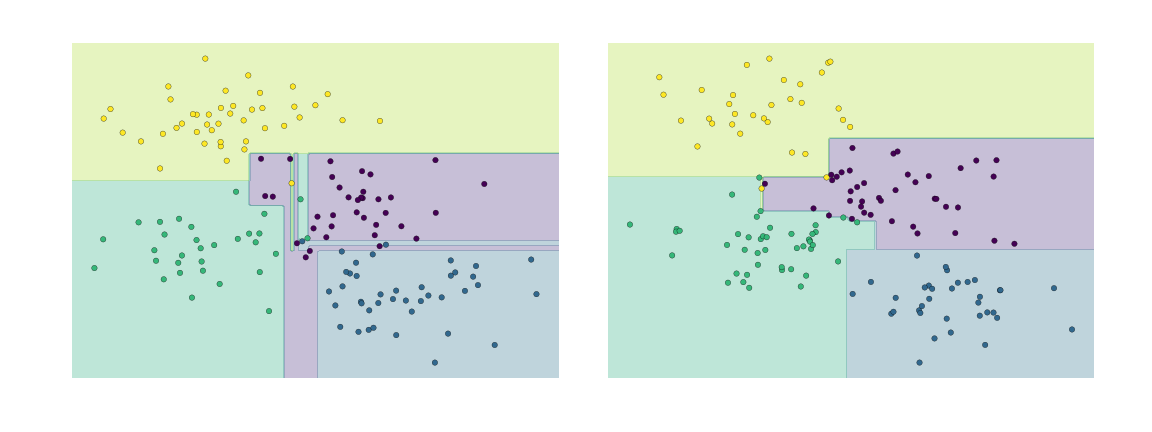

É claro que em alguns lugares, as duas árvores produzem resultados consistentes (por exemplo, nos quatro cantos), enquanto em outros lugares, as duas árvores dão classificações muito diferentes (por exemplo, nas regiões entre dois grupos quaisquer). A observação principal é que as inconsistências tendem a acontecer onde a classificação é menos certa e, portanto, ao utilizar informações de ambas as árvores, poderemos chegar a um resultado melhor.

### Conjuntos de Estimadores: Florestas Aleatórias


Essa noção de que vários estimadores com *overfitting* podem ser combinados para reduzir o efeito desse *overfitting* é o que fundamenta um método de aprendizado conjunto chamado *bagging*. 

*Bagging* faz uso de um conjunto de estimadores paralelos, cada um dos quais se ajusta demais os dados, e calcula a média dos resultados para encontrar uma classificação melhor. Um conjunto de árvores de decisão aleatórias é conhecido como *floresta aleatória*.

Este tipo de classificação *bagging* pode ser feita usando o meta-estimador `BaggingClassifier` do Scikit-Learn.

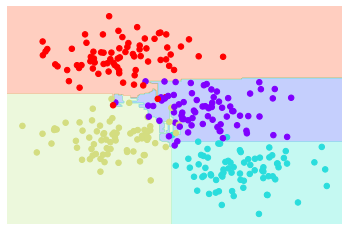

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

Neste exemplo, randomizamos os dados ajustando cada estimador com um subconjunto aleatório de 80% dos pontos de treinamento. 
Na prática, as árvores de decisão são randomizadas de forma mais eficaz ao injetar alguma estocasticidade na forma como as divisões são escolhidas: dessa forma, todos os dados contribuem para o ajuste a cada vez, mas os resultados do ajuste ainda têm a aleatoriedade desejada. 
Por exemplo, ao determinar em qual característica dividir, a árvore aleatória pode selecionar entre um dado número de características principais. 


No Scikit-Learn, esse conjunto otimizado de árvores de decisão aleatórias é implementado no estimador `RandomForestClassifier`, que cuida de toda a randomização automaticamente. Tudo que você precisa fazer é selecionar um número de estimadores e ele irá ajustar o conjunto de árvores.

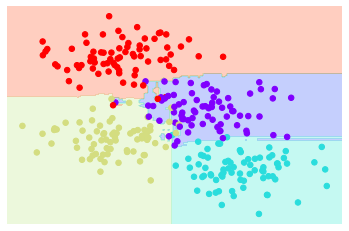

In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

Vemos que calculando a média de mais de 100 modelos criados aleatoriamente, terminamos com um modelo geral que está muito mais próximo da nossa intuição sobre como o espaço paramétrico deve ser dividido.

As florestas aleatórias são um método poderoso com diversas vantagens:

- Tanto o treinamento quanto a previsão são muito rápidos, devido à simplicidade das árvores de decisão subjacentes. Além disso, ambas as tarefas podem ser paralelizadas diretamente, porque as árvores individuais são entidades totalmente independentes.
- As múltiplas árvores permitem uma classificação probabilística: uma votação majoritária entre os estimadores dá uma estimativa da probabilidade (acessada no Scikit-Learn com o método `predict_proba`).
- O modelo não paramétrico é extremamente flexível e pode, portanto, ter um bom desempenho em tarefas que não são ajustadas por outros estimadores.

A principal desvantagem das florestas aleatórias é que os resultados não são facilmente interpretáveis, isto é, se você quiser tirar conclusões sobre o significado do modelo de classificação, as florestas aleatórias podem não ser a melhor escolha.